# Computer Vision Homework 1
## NetId: zc1213

### import packages

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.ion()

### defines some functions, including histogram, pdf, cdf calculating and equalization, matching, etc.

In [2]:
def setPrintAll():
    InteractiveShell.ast_node_interactivity = "all"
def setPrintLast():
    InteractiveShell.ast_node_interactivity = "last"
    
    
def displayImage(curImage):
    hist,_=calcHist(curImage)
    pdf=calcPdf(hist)
    cdf=calcCdf(pdf)
    
    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    
    plt.subplot(221)
    plt.imshow(curImage,cmap='gray')

    plt.subplot(222)
    plt.grid(True)
    plt.title('Histogram of Image')
    plt.xlabel('gray scale rank level')
    plt.ylabel('number of pixels')
    plt.bar(range(len(hist)), hist,width=0.8)

    plt.subplot(223)
    plt.grid(True)
    plt.title('PDF of Image')
    plt.xlabel('gray scale rank level')
    plt.ylabel('Probability density function')
    plt.plot(pdf)

    plt.subplot(224)
    plt.grid(True)
    plt.title('CDF of Image')
    plt.xlabel('gray scale rank level')
    plt.ylabel('Cumulative distribution function')
    plt.plot(cdf)

    plt.tight_layout()
    
def rgb2gray(rgb):
    if len(rgb.shape)<=2:
        return rgb
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
def calcHist(raw): 
    hist=np.zeros(256)
    unique, counts = np.unique(raw.astype(int), return_counts=True)
    for i,rank in enumerate(unique):
        hist[int(rank)]=counts[i]
    return hist,unique[0]

def calcPdf(hist):
    return hist/np.sum(hist)

def calcCumHist(hist):
    return np.cumsum(hist,dtype=int)

def calcCdf(pdf):
    return np.cumsum(pdf,dtype=float)

def histEqualize(curImage):
    hist,gmin=calcHist(curImage)
    chist=calcCumHist(hist)
    pdf=calcPdf(hist)
    cdf=calcCdf(pdf)
    
    eq=255*(chist[curImage.astype(int)]-chist[gmin])/(np.sum(hist)-chist[gmin])
    return eq

def histMatch(raw,target):
    g_img=rgb2gray(target)
    b_img=rgb2gray(raw)

    g_hist,g_min=calcHist(g_img)
    g_chist=calcCumHist(g_hist)
    g_pdf=calcPdf(g_hist)
    g_cdf=calcCdf(g_pdf)

    b_hist,b_min=calcHist(b_img)
    b_chist=calcCumHist(b_hist)
    b_pdf=calcPdf(b_hist)
    b_cdf=calcCdf(b_pdf)

    g_table=255*(g_chist[np.arange(0,256,1)-g_chist[g_min]])/(np.sum(g_hist)-g_chist[g_min])
    inv_gcdf=np.poly1d(np.polyfit(g_table,np.arange(0,256,1),deg=7))
    eq_b_img=histEqualize(b_img)
    matched_b_img=inv_gcdf(eq_b_img)
    
    return matched_b_img

### read images

In [16]:
image_chang=misc.imread('./chang.png')
image_checker128=misc.imread('./checker128-var20.png')
image_checker196=misc.imread('./checker196-var20.png')
image_ctscan=misc.imread('./CTscan.jpg')
image_crowd=misc.imread('./crowd.png')
image_lenna=misc.imread('./lenna.jpg')
image_tony=misc.imread('./tony.png')
image_stark=misc.imread('./stark.jpg')

### B1 Hist,PDF,CDF plotting

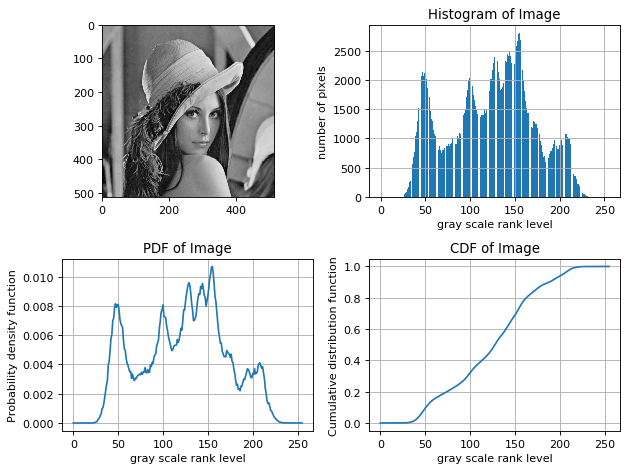

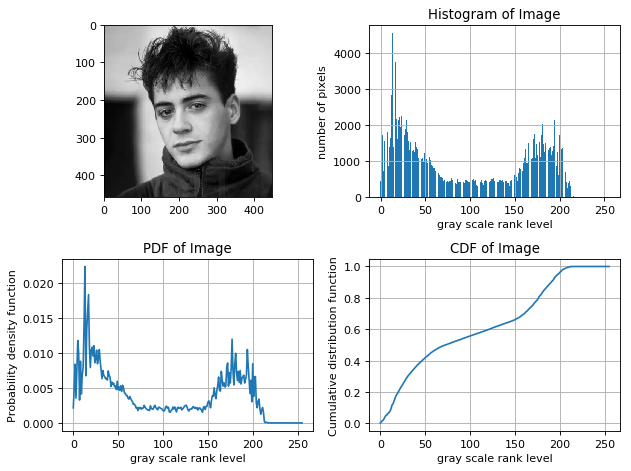

In [67]:
displayImage(rgb2gray(image_lenna))
displayImage(rgb2gray(image_tony))

### B2 Histogram Equalization

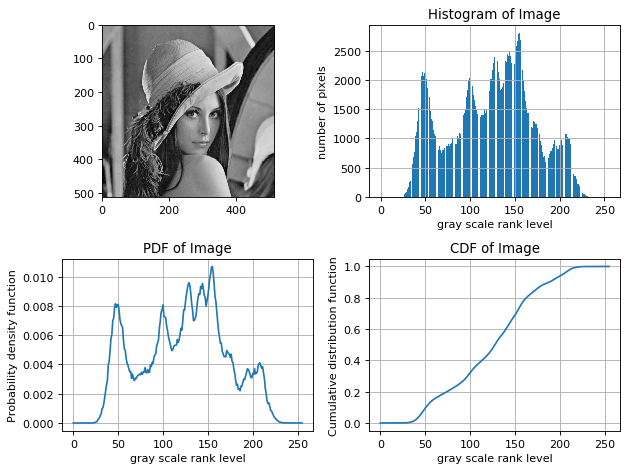

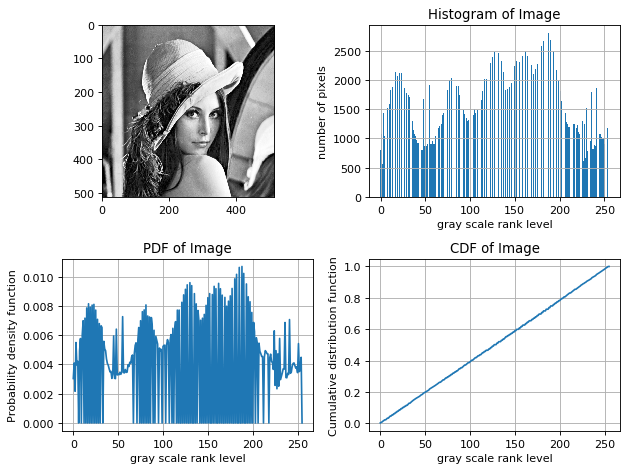

In [115]:
img=rgb2gray(image_crowd)
eq_img=histEqualize(img)
displayImage(img)
displayImage(eq_img)

### B3 Histogram Matching

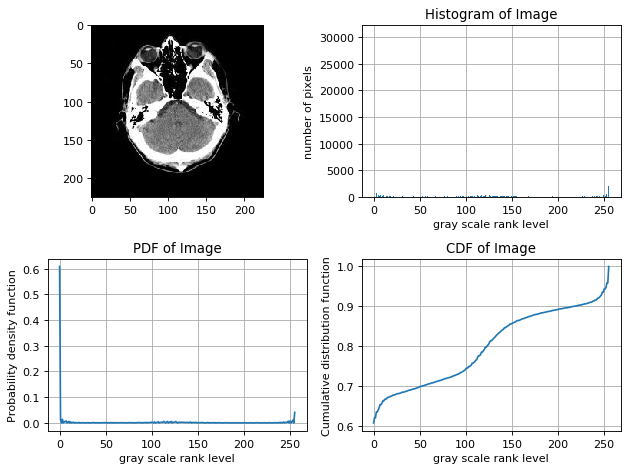

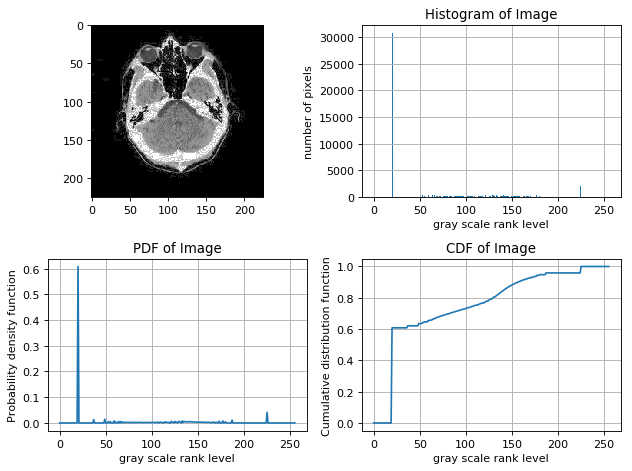

In [116]:
r=rgb2gray(image_ctscan)
t=rgb2gray(image_lenna)
matched_r=histMatch(raw=r,target=t)
# displayImage(histEqualize(r))
displayImage(r)
displayImage(matched_r)